# Dynamics Problem Set No.1

Problem 1

In [42]:
import numpy as np
from scipy import linalg
with open('matrix_data.txt') as file:
    array2d = np.array([[float(digit) for digit in line.split()] for line in file])
lambdas = linalg.eig(array2d, b=None, left=False, right=False)
spectralradius = max(abs(lambdas))

i_max = 100000

def spectral_theorem(i):
    product = np.linalg.matrix_power(array2d,i)
    nu = np.ones(10)
    vector = product @ nu
    normvector = linalg.norm(vector, ord = 2)
    converge = normvector**(1/i)
    difference = converge - spectralradius
    return difference
       
sequence = []

for iter in range(1,i_max+1):
    sequence.append(spectral_theorem(iter))
    
sequence[-1]
    

1.200420037306138e-05

Problem 2

17.743539


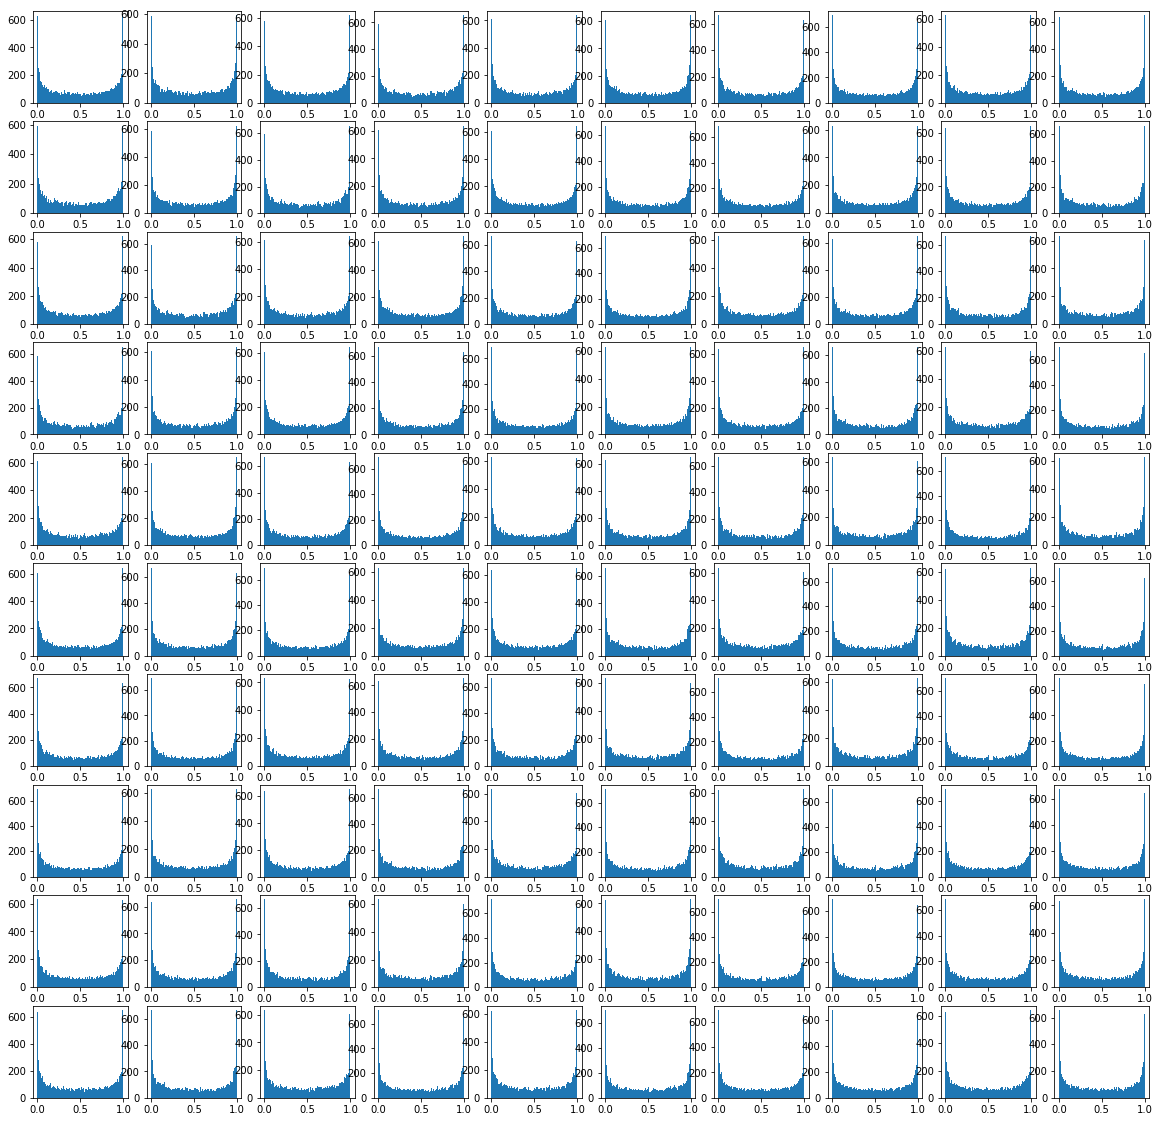

In [8]:
import time
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from numba import jit

timeseries_size=10000

@jit
def gx(x):
    gx = 4 * x * (1 - x)
    return gx

@jit
def timeseries(x):
    A = np.array(x)
    A = np.append(A, gx(x))
    iter = 1
    while iter < timeseries_size:
        A = np.append(A, gx(A[-1]))
        iter += 1
    return A

@jit
def initial_conditions():
    initial_conditions = np.empty(100)
    for i in range(100):
        initial_conditions[i] = np.random.uniform(0,1,1)
    return initial_conditions

@jit
def plotting():
    fig, ax = plt.subplots(10,10, figsize=(20,20))
    for i in range(10):
        for j in range(10):
            ax[i,j].hist(timeseries(init[i+j]), bins = 100)
    


time_start = time.clock()
init = initial_conditions()
plotting()
time_elapsed = (time.clock()-time_start)
print('time for computation is: ', time_elapsed)        
fig.savefig('plot.pdf')

Problem 3

We are given the following-
(i) $g$ is continuous at $\hat{x}$

(ii) $g^t(\hat{x}) \rightarrow \hat{x}$ as $x \rightarrow \infty$

Proof-
Since we are given that $g^t(x) \rightarrow \hat{x}$,  there exists  $x^\prime, \epsilon, \delta_1 > 0$ such that:
$$|g(x^\prime) - \hat{x}| < \epsilon/2 $$ if $$|x^\prime - \hat{x}|<\delta_1$$

We are also given that $g(x)$ is continuous at $\hat{x}$, which means that there exists $\delta_2 > 0$ such that 
$$\Rightarrow |g(x^\prime) - g(\hat{x})| < \epsilon/2$$ if $$|x^\prime - \hat{x}|<\delta_2$$

Choosing $\delta = \min(\delta_1, \delta_2)$, we have 
$$|g(x^\prime) - \hat{x}| < \epsilon/2 $$ and 
$$|g(x^\prime) - g(\hat{x})| < \epsilon/2$$ 
if $$|x^\prime - \hat{x}|<\delta$$

Therefore we have
$$|g(\hat{x}) - \hat{x}| = |g(\hat{x}) + g(x^\prime) - g(x^\prime) - \hat{x}|$$
$$ = |g(\hat{x}) - g(x^\prime) + g(x^\prime) - \hat{x}|$$
$$ \le |g(\hat{x}) - g(x^\prime)| + |g(x^\prime) - \hat{x}|$$ 
$$ < \epsilon/2 + \epsilon/2 = \epsilon$$

if $|\hat{x} - x^\prime|< \delta$ i.e $x^\prime \ne \hat{x}$

Which shows that the distance between $g(\hat{x})$ and $\hat{x}$ is arbitrarily small. Hence $g(\hat{x}) \rightarrow \hat{x}$ 



# Homework 2

Problem 1

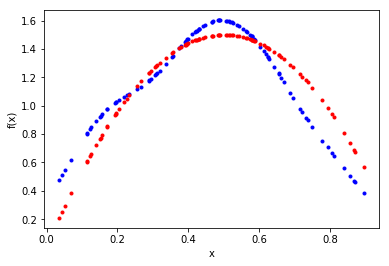

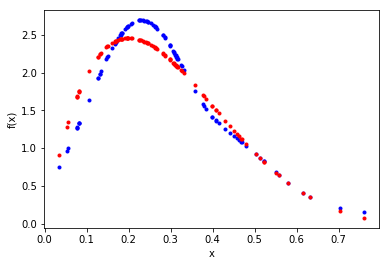

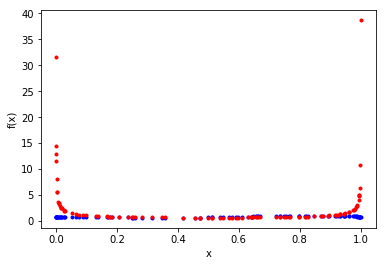

In [3]:
import numpy as np
from scipy import stats
from scipy.stats import beta
from scipy.stats import norm 
from matplotlib import pyplot as plt

def density(a,b,n):
    x = np.random.beta(a,b,n)
    h = 1.06*((np.var(x))**0.5)*n**(-1/5)
    nh = 1/(n*h)
    B = nh*normalfunc(x,h)
    plt.plot(x,B,'b.')
    plt.plot(x,beta.pdf(x,a,b),'r.')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    return plt.show()


def normalfunc(x,h):
    list =np.empty(len(x))
    for i in range(len(x)):
        pdfnormal=norm.pdf((x-x[i])/h,0,1)
        list = list + pdfnormal
    return list


density(2,2,100)
density(2,5,100)
density(0.5,0.5,100)



Problem 2

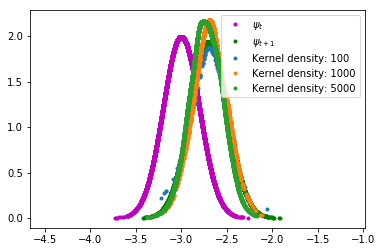

In [4]:
import numpy as np
from scipy import stats
from scipy.stats import norm 
from matplotlib import pyplot as plt

rho = 0.9
b = 0.0
sigma = 0.1
mu = -3
s = 0.2

x= norm.rvs(mu,s, size=10000)
fx = norm.pdf(x,mu,s)
plt.plot(x,fx,'m.', label='$\psi_t$')
plt.axis('equal')
plt.legend()


x1= norm.rvs(rho*mu+ b, (((rho*s)**2)+sigma**2)**0.5, size=10000)
fx1= norm.pdf(x1, rho*mu+ b, (((rho*s)**2)+sigma**2)**0.5)
plt.plot(x1,fx1,'g.', label='$\psi_{t+1}$')
plt.legend()
plt.xlim(-4,-2)


def draws(n,mu,s):
    x = s*np.random.randn(n)+mu
    return x

def update(n,mu,s):
    xt1=rho*draws(n,mu,s)+b+sigma*(np.random.randn(1))
    return xt1


def density(x,n):
    h = 1.06*((np.var(x))**0.5)*n**(-1/5)
    nh = 1/(n*h)
    B = nh*normalfunc(x,h)
    plt.plot
    return x,B

def normalfunc(x,h):
    list =np.empty(len(x))
    for i in range(len(x)):
        pdfnormal=norm.pdf((x-x[i])/h,0,1)
        list = list + pdfnormal
    return list

for i,j in enumerate([100,1000,5000]): 
    A = density(update(j,mu,s),j)
    plt.plot(A[0], A[1], '.', label=""'Kernel density: '+str(j))
    plt.axis('equal')
    plt.legend()
plt.show()
   


Problem 3

We can write:
$$||A^{k}|| = ||A^{k-1}*A||^k$$
By the multiplicative property proved in class, we have 
$$\Rightarrow ||A^k||\le ||A^{k-1}||^{k*1/k}*||A||$$
$$\Rightarrow \lim_{k\rightarrow\infty}||A||^k \le \left[\lim_{k\rightarrow\infty}||A^{k-1}||^{1/k}\right]^k||A||$$
Applying Gelfand's formula and noting that $\lim_{k\rightarrow\infty}r(A)^k=0$
$$\Rightarrow \lim_{k\rightarrow\infty}||A||^k \le 0$$
Since Norm is non negative, the inequality cannot hold. Hence
$$\lim_{k\rightarrow\infty}||A||^k = 0$$

# Homework 3

Problem 1,2,3

Text(0.3,0.3,'Ergodic n: 1000, Ergodic T: 10000 ')

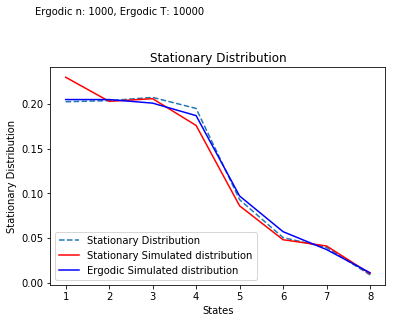

In [5]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt

P = [[0.222, 0.222, 0.215, 0.187, 0.081, 0.038, 0.029, 0.006],
     [0.221, 0.220, 0.215, 0.188, 0.082, 0.039, 0.029, 0.006],
     [0.207, 0.209, 0.210, 0.194, 0.090, 0.046, 0.036, 0.008],
     [0.198, 0.201, 0.207, 0.198, 0.095, 0.052, 0.040, 0.009],
     [0.175, 0.178, 0.197, 0.207, 0.110, 0.067, 0.054, 0.012],
     [0.182, 0.184, 0.200, 0.205, 0.106, 0.062, 0.050, 0.011],
     [0.123, 0.125, 0.166, 0.216, 0.141, 0.114, 0.094, 0.021],
     [0.084, 0.084, 0.142, 0.228, 0.170, 0.143, 0.121, 0.028]]

mc=qe.MarkovChain(P)
A=mc.stationary_distributions

states=np.arange(1,9)
plt.plot(states, A.T,'--', label="Stationary Distribution")
plt.xlabel('States')
plt.ylabel('Stationary Distribution')
plt.title('Stationary Distribution')
plt.legend()

A = mc.simulate(1000)
B=np.zeros(8)
for i in range(8):
    B[i]=np.mean(A==i)
states=np.arange(1,9)
plt.plot(states, B, 'r', label="Stationary Simulated distribution") 
plt.legend()

def ergodicity(n,T):
    mc=qe.MarkovChain(P)
    A=[None]*n
    for i in range(n):
        path=mc.simulate(T)
        A[i]=path
    return A

def dist_ergodic(x,T):
    B=np.empty(len(x))
    for i in range(len(x)):
        B[i]=x[i][T-1]
    return B
        
states=np.linspace(1,8,8)   
Q=ergodicity(1000,10000)
R=dist_ergodic(Q,10000)

S=np.zeros(8)
for i in range(8):
    S[i]=np.mean(R==i)
plt.plot(states, S, 'b', label="Ergodic Simulated distribution") 
plt.legend()
plt.text(0.3,0.3,'Ergodic n: 1000, Ergodic T: 10000 ')

